##### Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#3.1-bullet)

##### Часть 2. Подготовка данных:
* [2. Приведение данных к нужным типам.](#3.2-bullet)
* [3. Поиск и исправление ошибок в данных.](#3.3-bullet)
* [4. Рассчёт дополнительных параметров.](#3.4-bullet)

##### Часть 3. Анализ данных:
* [5. Анализ количества минут разговора.](#3.5-bullet)
* [6. Анализ количества сообщений.](#3.6-bullet)
* [7. Анализ интернет-трафика.](#3.7-bullet)

##### Часть 4. Проверка гипотез:
* [8. Проверка гипотезы что средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается.](#3.8-bullet)
* [9. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.](#3.9-bullet)

##### Часть 5. Обший вывод:
* [10. Обший вывод.](#3.10-bullet)


### Часть 1. Изучение общей информации. 

<a id='3.1-bullet'></a> 
### 1. Изучение файлов с данными, получение общей информации, загрузка библиотек. 

Для анализа предоставлены 5 файлов с данными:
* users - информация о пользователях
* calls - информация о звонках
* messages - информация о сообщениях
* internet - информация об интернет-сессиях
* tariffs - информация о тарифах

Изучим данные в этих файлах.

In [1]:
# подключим необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

* #### users - информация о пользователях

In [2]:
users = pd.read_csv('./datasets/users.csv')

Получим первые 10 строк таблицы.

In [3]:
display(users.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Выведем общую информацию о данных в таблице *users*

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Всего в таблице 8 столбцов с типоми данных *int* и *object*. 

Информация, содержащаяся в столбцах:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

* #### calls - информация о звонках

In [5]:
calls = pd.read_csv('./datasets/calls.csv')

Получим первые 10 строк таблицы.

In [6]:
display(calls.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Выведем общую информацию о данных в таблице *calls*

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Всего в таблице 4 столбца с типоми данных *int*, *float* и *object*. 

Информация, содержащаяся в столбцах:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

* #### messages - информация о сообщениях

In [8]:
messages = pd.read_csv('./datasets/messages.csv')

Получим первые 10 строк таблицы.

In [9]:
display(messages.head(10))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Выведем общую информацию о данных в таблице *messages*

In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Всего в таблице 3 столбца с типоми данных *int* и *object*. 

Информация, содержащаяся в столбцах:

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

* #### internet - информация об интернет-сессиях

In [11]:
internet = pd.read_csv('./datasets/internet.csv')

Получим первые 10 строк таблицы.

In [12]:
display(internet.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Выведем общую информацию о данных в таблице *internet*

In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Всего в таблице 5 столбцов с типоми данных *int*, *float* и *object*. 

Информация, содержащаяся в столбцах:

* Unnamed: 0 - неизвестный столбец
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

* #### tariffs - информация о тарифах

In [14]:
tariffs = pd.read_csv('./datasets/tariffs.csv')

Получим первые 10 строк таблицы.

In [15]:
display(tariffs.head(10))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Выведем общую информацию о данных в таблице *tariffs*

In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Всего в таблице 8 столбцов с типоми данных *int* и *object* и всего 2 записи, которые соответствуют 2 тарифам оператора.

Информация, содержащаяся в столбцах:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

У нас есть 5 таблиц с информацией по пользователям, тарифам и операциям пользователей (звонки, сообщения, пользование интернетом). В совокупности имеем базу данных по операциям пользователей 2-х тарифов.

### Часть 2. Подготовка данных.

<a id='3.2-bullet'></a>
### 2. Приведение данных к нужным типам

* #### В таблице users Имеет смысл привести столбцы *reg_date* и *churn_date* к типу *date*

In [17]:
# для столбца reg_date
users.reg_date = pd.to_datetime(users.reg_date, format='%Y-%m-%d')

# для столбца churn_date
users.churn_date = pd.to_datetime(users.churn_date, format='%Y-%m-%d')

# проверим результат
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


* #### В таблице calls имеет смысл привести столбцы id и duration в целочислленный вид, а столбец call_date в формат даты

Столбез 'id' представлен в формате строки в виде '1000_x', попытаемся перевести его в числовой формат.

In [18]:
calls.id = calls.id.astype('int')

# выведем результат на экран
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0.00,1000
1,10001,2018-08-17,0.00,1000
2,10002,2018-06-11,2.85,1000
3,10003,2018-09-21,13.80,1000
4,10004,2018-12-15,5.18,1000


Преобразование произошло, но нам важно качество, а это показывается в данном случае тем, что все id уникальны. Проверим это.

In [19]:
calls.id.duplicated().sum()

0

Все id уникальны.

Столбец duration имеет формат числа с плавающей запятой, а следовательно, там записаны минуты с долями. Нам известно что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Чтобы учесть этот факт, округлим значения в этом столбце вверх и приведём его к целочисленному типу.

In [20]:
calls.duration = np.ceil(calls.duration).astype('int')

# проверим результат
calls.duration.dtype

dtype('int32')

И преобразуем столбец *call_date* в формат даты.

In [21]:
calls.call_date = pd.to_datetime(calls.call_date, format='%Y-%m-%d')

# проверим результат:
calls.call_date.dtype

dtype('<M8[ns]')

* #### В таблице messages приведём столбец id в целочислленный вид, а столбец message_date в формат даты

In [22]:
# переводим столбец id в целочисленный формат
messages.id = messages.id.astype('int')

# переводим столбец message_date в формат даты
messages.message_date = pd.to_datetime(messages.message_date, format='%Y-%m-%d')

* #### В таблице internet приведём столбцы id и mb_used в целочислленный вид, а столбец  в формат даты

In [23]:
# переводим столбец id в целочисленный формат
internet.id = internet.id.astype('int')

# переводим столбец session_date в формат даты
internet.session_date = pd.to_datetime(internet.session_date, format='%Y-%m-%d')

Столбец mb_used имеет формат числа с плавающей запятой и дробной частью. Нам известно что «Мегалайн» всегда округляет вверх значения минут и мегабайтов.

Чтобы учесть этот факт, округлим значения в этом столбце вверх и приведём его к целочисленному типу.

In [24]:
internet.mb_used = np.ceil(internet.mb_used).astype('int')

# проверим результат
internet.mb_used.dtype

dtype('int32')

<a id='3.3-bullet'></a>
### 3. Поиск и исправление ошибок в данных

Напишем метод для поиска столбцов с пропущенными значениями

In [25]:
def find_null_values(df):
    counter = 0
    for column in df.columns:
        null_count = df[column].isna().sum()
        if null_count > 0:
            counter += 1
            print('В столбце {} {} пропущенных значений'.format(column, null_count))
    if counter == 0:
        print('Столбцов с пропущенными значениями в таблице нету')

Напишем метод для проверки базовых параметров (отсутствие пропущенных значений, проверка уникальности id, соотвествие user_id с одним из user_id в таблице users, проверка дубликатов) для таблиц calls, mesages и internet

In [26]:
def check_base_parameters(df):
    find_null_values(df)
    if df.id.duplicated().sum() == 0:
        print('Все id уникальны.')
    else:
        print('Есть не уникальные id')
    
    if df.query('user_id not in @users.user_id').user_id.count() == 0:
        print('Все user_id в таблице существуют в таблице users')
    else:    
        print('Tcnm user_id не существующие в таблице users')
    
    if df.duplicated().sum() == 0:
        print('Дубликатов нету')
    else:
        print('Есть дубликаты')

* #### Проверим таблицу users на качество данных.

Посмотрим в каких столбцах есть пропущенные значения.

In [27]:
find_null_values(users)

В столбце churn_date 462 пропущенных значений


Пропущенные значения в столбце churn_date значит тариф ещё действовал на момент выгрузки данных - это не является ошибкой

Проверим *user_id* на уникальность

In [28]:
users.user_id.duplicated().sum()

0

Все id пользователей уникальны.

Проверим есть ли пользователи с полным совпадением имени, фамилии и возраста. Для этого создадим новый датафрейм с этими столбцами, приведём строковые к нижнему регистру и проверим все строки на полное совпадение.

In [29]:
# создаём новую таблицу
tmp_users = users[['first_name', 'last_name', 'age']]

# приводим строковые столбцы к нижнему регистру
tmp_users.first_name.str.lower()
tmp_users.last_name.str.lower()

# проверяем дубликаты
tmp_users.duplicated().sum()

# освобождаем память
del tmp_users

Повторяющихся людей нету.

Посмотрим на возраст пользователей

In [30]:
print(sorted(users.age.unique()))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Возраст от 18 до 75 лет - всё в норме.

Проверим дату подключения. Год должен быть не позже 2018

In [31]:
print(sorted(users.reg_date.dt.year.unique()))

[2018]


Только 2018 год. Ошибок нету. Повторим с датой прекращения пользования тарифом

In [32]:
print(sorted(users.churn_date.dt.year.unique()))

[nan, 2018.0]


Снова без ошибок.

Проверим тарифы.

In [33]:
users.tariff.value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

В таблице **users** ошибок не обнаружено

* #### Проверим таблицу calls на качество данных.

In [34]:
check_base_parameters(calls)

Столбцов с пропущенными значениями в таблице нету
Все id уникальны.
Все user_id в таблице существуют в таблице users
Дубликатов нету


Проверим даты звонков. Так как все данные за 2018 год, то и звонки должны быть только в 2018 году.

In [35]:
print(sorted(calls.call_date.dt.year.unique()))

[2018]


всё в порядке.

Посмотрим на максимальную и минимальнуюб длительность звонков

In [36]:
print('Минимальная длительность звонка', calls.duration.min())
print('Максимальная длительность звонка', calls.duration.max())

Минимальная длительность звонка 0
Максимальная длительность звонка 38


Есть звонки с длительностью 0 минут. Это, скорее всего, недозвоны. Эти звонки без разговора, они не вляют на расходование минут тарифа, за них не платят деньги. Эти звонки не несут в себе статистической нагрузки, нол будут смещать статистические данные - среднюю, дисперсию, портить график распределения. По сути, значение 0 в этом столбце можно приравнять к отсутствию звонка. Считаю что эти записи надо удалить, чтобы они не портили статистическую картину.

In [37]:
calls.drop(calls[calls.duration == 0].index, inplace=True)

# проверим остались ли звонки нулевой длительности
print(calls.query('duration == 0').id.count())

0


* #### Проверим таблицу messages на качество данных.

In [38]:
check_base_parameters(messages)

Столбцов с пропущенными значениями в таблице нету
Все id уникальны.
Все user_id в таблице существуют в таблице users
Дубликатов нету


Проверим даты сообщений. Так как все данные за 2018 год, то и сообщения должны быть только в 2018 году.

In [39]:
print(sorted(messages.message_date.dt.year.unique()))

[2018]


всё в порядке.

* #### Проверим таблицу internet на качество данных.

In [40]:
check_base_parameters(internet)

Столбцов с пропущенными значениями в таблице нету
Все id уникальны.
Все user_id в таблице существуют в таблице users
Дубликатов нету


Проверим максимальный и минимальный объёмы трафика, потраченные за сессию

In [41]:
print('Минимальный трафик', internet.mb_used.min())
print('Максимальный  трафик', internet.mb_used.max())

Минимальный трафик 0
Максимальный  трафик 1725


Разберёмся с нулевым трафиком. Нулевой трафик это похоже на ошибку, так как сам факт подключения к сети подразумевает под собой уже какой-то трафик с переданной информацией об устройстве, его IP и прочий минипальный пакет данных для подключения к сети.

Для начала узнаем много ли таких нулей в данных.

In [42]:
internet.query('mb_used == 0').mb_used.count()

19598

В процентах от всей выборки:

In [43]:
print(internet.query('mb_used == 0').mb_used.count() / internet.mb_used.count())

0.13118155773916304


13% выборки с нулевым трафиком. Это достаточно много. Но это ошибки.

С каким количеством пользователей это случалось.

In [44]:
len(internet.query('mb_used == 0').user_id.unique())

494

Практически со всеми. Только с 6 не было такого.

Мы не знаем что это, мы знаем что практически у всех пользователей есть такие случаи. Если принять за факт что данные их этой таблицы являются основанием для списания средств со счёта клиента, то трафик 0 не несёт в себе никакой финансовой нагрузки, но портит статистическую картину. Думаю, как и с нулевым временем звонков, от этих записей в выборке надо избавиться.

In [45]:
internet.drop(internet[internet.mb_used == 0].index, inplace=True)

# проверим остались ли звонки нулевой длительности
print(internet.query('mb_used == 0').id.count())

0


Удалим так же из этой таблицы лишний столбец *Unnamed: 0*

In [46]:
internet.drop(['Unnamed: 0'], axis = 1, inplace=True)

# проверим
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  int32         
 1   mb_used       129798 non-null  int32         
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 4.0 MB


### Вывод.

В целом данные, в предоставленных нам таблицах, в порядке. Пришлось только подчистить звонки с нулевой длительностью и интернет сессиии с нулевым трафиком. И то и другое не несло в себе нагрузки в плане доходности тарифов, но могло повлиять на статистические показатели при их исследовании. Так же пришлось удалить лишний столбец в таблице **internet**. Судя по всему это была дублирующая индексация, которая нам для исследования не нужна.

<a id='3.4-bullet'></a>
### 4. Рассчёт дополнительных параметров.

Создадим новые датафреймы, в который сведём все минуты разговора, количество смс и интернет траффика для каждого пользователя по месяцам.

In [47]:
users_actions_per_months = calls.pivot_table(index=['user_id', calls.call_date.dt.month], values='duration', aggfunc='sum').join(
    [messages.pivot_table(index=['user_id', calls.call_date.dt.month], values='id', aggfunc='count'), 
     internet.pivot_table(index=['user_id', calls.call_date.dt.month], values='mb_used', aggfunc='sum')]
).reset_index()

# переименуем столбцы
users_actions_per_months.columns = ['user_id', 'month', 'calls_min', 'message_count', 'internet_mb']

display(users_actions_per_months.head(10))

,user_id,month,calls_min,message_count,internet_mb
0,1000,5,159.0,17.0,3205.0
1,1000,6,172.0,28.0,7891.0
2,1000,7,340.0,41.0,11342.0
3,1000,8,408.0,43.0,15426.0
4,1000,9,466.0,47.0,15454.0
5,1000,10,350.0,44.0,11715.0
6,1000,11,338.0,83.0,11423.0
7,1000,12,333.0,87.0,10102.0
8,1001,11,430.0,NaN,3675.0
9,1001,12,414.0,NaN,1441.0


Смержим эту таблицу со столбцами таблицы **users**, необходимые для дальнейшего анализа

In [48]:
users_actions_per_months = users[['user_id', 'tariff', 'city', 'reg_date', 'churn_date']].merge(users_actions_per_months, on='user_id')

# посмотрим результат
display(users_actions_per_months.head())

,user_id,tariff,city,reg_date,churn_date,month,calls_min,message_count,internet_mb
0,1000,ultra,Краснодар,2018-05-25,NaT,5,159.0,17.0,3205.0
1,1000,ultra,Краснодар,2018-05-25,NaT,6,172.0,28.0,7891.0
2,1000,ultra,Краснодар,2018-05-25,NaT,7,340.0,41.0,11342.0
3,1000,ultra,Краснодар,2018-05-25,NaT,8,408.0,43.0,15426.0
4,1000,ultra,Краснодар,2018-05-25,NaT,9,466.0,47.0,15454.0


Добавим в таблицу помесячную выручку с каждого пользователя. Для этого нужно вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножить на значение из тарифного плана и прибавить абонентскую плату, соответствующую тарифному плану.

In [50]:
tariffs.iloc[tariffs.query('tariff_name == "smart"').index[0]].rub_per_gb

200

In [50]:
# метод для рассчёта выручки
def get_monthly_profit(row):
    tariff = tariffs.iloc[tariffs.query('tariff_name == @row.tariff').index[0]]
    result = max(0, row.calls_min - tariff.minutes_included) * tariff.rub_per_minute + \
             max(0, row.message_count - tariff.messages_included) * tariff.rub_per_message + \
             max(0, (row.internet_mb - tariff.mb_per_month_included) / 1024) * tariff.rub_per_gb
    if (row.month >= row.reg_date.month) and (pd.isnull(row.churn_date) or row.month <= row.churn_date.month):
        result += tariff.rub_monthly_fee
    return result

users_actions_per_months['monthly_profit'] = users_actions_per_months.apply(get_monthly_profit, axis=1)

# посмотрим результат
users_actions_per_months.head()

,user_id,tariff,city,reg_date,churn_date,month,calls_min,message_count,internet_mb,monthly_profit
0,1000,ultra,Краснодар,2018-05-25,NaT,5,159.0,17.0,3205.0,1950.0
1,1000,ultra,Краснодар,2018-05-25,NaT,6,172.0,28.0,7891.0,1950.0
2,1000,ultra,Краснодар,2018-05-25,NaT,7,340.0,41.0,11342.0,1950.0
3,1000,ultra,Краснодар,2018-05-25,NaT,8,408.0,43.0,15426.0,1950.0
4,1000,ultra,Краснодар,2018-05-25,NaT,9,466.0,47.0,15454.0,1950.0


### Вывод.

Теперь у нас есть таблица в которог собраны все данные для последующего анализа: 
* calls_min - количество минут разговора каждого абонента по месяцам
* message_count - количество смс каждого абонента по месяцам
* internet_mb - количество трафика каждого абонента по месяцам
* monthly_profit - помесячная выручка от каждого пользователя по месяцам

### Часть 3. Анализ данных.

In [51]:
# метод для вывода гистограммы, среднего, дисперсии и стандартного отклонения
def print_statistic_datas(series):
    print('Среднее', series.mean())
    # так как у нас выборка, то степень свободы выставляем равным 1
    print('Дисперсия', np.var(series, ddof=1))
    print('Стандартное отклонение', np.std(series, ddof=1))

In [52]:
# метод для построения гистограмм
def build_hist(column, title='', xlabel='', bins=100, figsize=(16, 9)):
    fig = plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()

    sns.histplot(ultra_users[column], bins=bins, kde=True, color='red', label='тариф ultra')
    sns.histplot(smart_users[column], bins=bins, kde=True, color='blue', label='тариф smart')
    ylim = plt.ylim()
    plt.vlines(ultra_users[column].mean(), ylim[0], ylim[1], linestyle = '--', label='средняя для тарифа ultra', color='red')
    plt.vlines(smart_users[column].mean(), ylim[0], ylim[1], linestyle = '--', label='средняя для тарифа smart', color='blue')

    ax.grid()
    plt.gca().set(xlabel=xlabel, ylabel='Частота')
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=12)    
    
    plt.show()

Разделим наш датафрейм на абонентов с тарифом 'smart' и 'ultra'

In [53]:
ultra_users = users_actions_per_months.query('tariff == "ultra"')
smart_users = users_actions_per_months.query('tariff == "smart"')

<a id='3.5-bullet'></a>
### 5. Анализ количества минут разговора

Посчитаем среднее, дисперсию и стандартное отклонение для клиентов с тарифом 'smart'.

In [54]:
print_statistic_datas(smart_users.calls_min)

Среднее 419.4403421882035
Дисперсия 35718.128533936935
Стандартное отклонение 188.9924033762652


Судя по дисперсии и стандартному отклонению разброс велик

Посчитаем среднее, дисперсию и стандартное отклонение для клиентов с тарифом 'ultra'.

In [55]:
print_statistic_datas(ultra_users.calls_min)

Среднее 547.7550158394931
Дисперсия 93338.4282914109
Стандартное отклонение 305.513384799113


На тарифе "ultra" средняя больше, а значит абоненты в этом тарифе тратят больше минут разговора в месяц. Но и дисперсия с стандартным отклонением тоже больше, а значит разброс по этому параметру гораздо больше чем на тарифе "smart". 

Отобразим гистограмму распределения разговоров в месяц для абонентов двух тарифов.

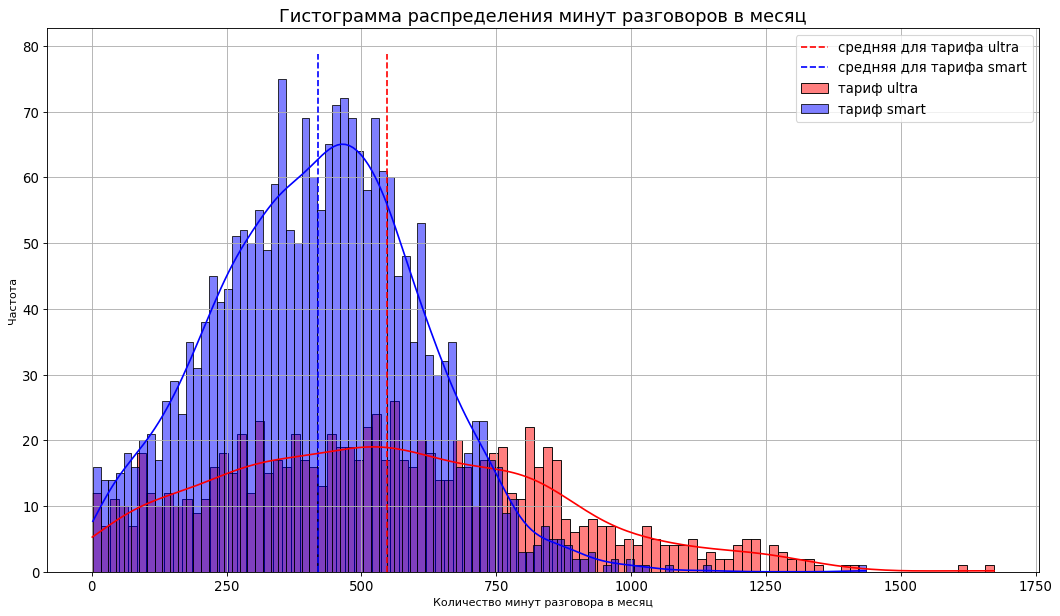

In [56]:
build_hist('calls_min', title='Гистограмма распределения минут разговоров в месяц', xlabel='Количество минут разговора в месяц')

На гистограмее видно различия в поведение абонентов разных тарифов. По положению средних можно сказать, что абоненты тарифа "ultra" в среднем тратят больше минут разговора в месяц чем абоненты тарифа "smart". Кроме того, если для тарифа 'smart' характерно нормальное распределение со скошенностью влево и большинство значений сосредоточено не очень далеко от средней, то для тарифа "ultra" распределение более равномерное на достаточно большом промежутке и разброс от среднего достаточно большой, что может говорить о разнородности абонентов этого тарифа.

<a id='3.6-bullet'></a>
### 6. Анализ количества сообщений.

Посчитаем среднее, дисперсию и стандартное отклонение для клиентов с тарифом 'smart'.

In [57]:
print_statistic_datas(smart_users.message_count)

Среднее 29.930497303774715
Дисперсия 807.4472048484646
Стандартное отклонение 28.415615510638943


По дисперсии и стандартному отклонению можно предположить, что абоненты тарифа 'smart' не сильно разбросаны по количеству сообщений в месяц.

Посчитаем среднее, дисперсию и стандартное отклонение для клиентов с тарифом 'ultra'.

In [58]:
print_statistic_datas(ultra_users.message_count)

Среднее 43.18077474892396
Дисперсия 1687.6827907782124
Стандартное отклонение 41.08141661114198


Абоненты тарифа "ultra" в среднем больше пользуются смс сообщениями, а дисперсия и стандартное отклонение говорят так же о большем разбросе по количеству смс в месяц.

Отобразим гистограмму распределения смс сообщений в месяц для абонентов двух тарифов.

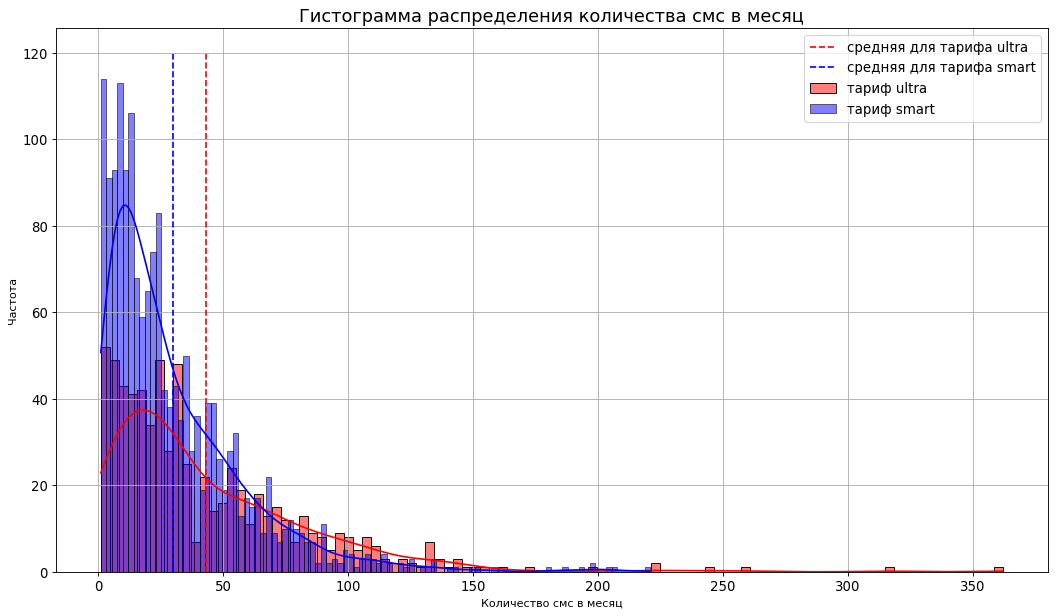

In [59]:
build_hist('message_count', title='Гистограмма распределения количества смс в месяц', xlabel='Количество смс в месяц')

И в том и другом случае на гистограмме получилось Пуасоновское распределение. которое прижато к нулю, что говорит о том что смс сообщения не популярны у абонентов и того и другого тарифов, однако, абоненты тарифа "ultra" в среднем в 2 раза чаще пользуются этой услугой.

<a id='3.7-bullet'></a>
### 7. Анализ интернет-трафика.

Посчитаем среднее, дисперсию и стандартное отклонение для клиентов с тарифом 'smart'.

In [60]:
print_statistic_datas(smart_users.internet_mb)

Среднее 12145.347911547911
Дисперсия 67942141.61734442
Стандартное отклонение 8242.702324926238


По дисперсии и стандартному отклонению можно сказать что интернетом пользуются достаточно стабильно в плане траффика - не очень большое стандартное отклонение.

Посчитаем среднее, дисперсию и стандартное отклонение для клиентов с тарифом 'ultra'.

In [61]:
print_statistic_datas(ultra_users.internet_mb)

Среднее 14915.313095238096
Дисперсия 145896011.10924432
Стандартное отклонение 12078.742116182642


Траффик в месяц абонентов тарифа "ultra" тоже достаточно сконцетрирован около средней, а средние пользования интернет трафиком в месяц для этих тарифов гораздо меньше различаются чем длительность звонков и смс сообщений. Интернет примерно одинаково востребован у абонентов обоих тарифных планов.

Отобразим гистограмму распределения смс сообщений в месяц для абонентов двух тарифов.

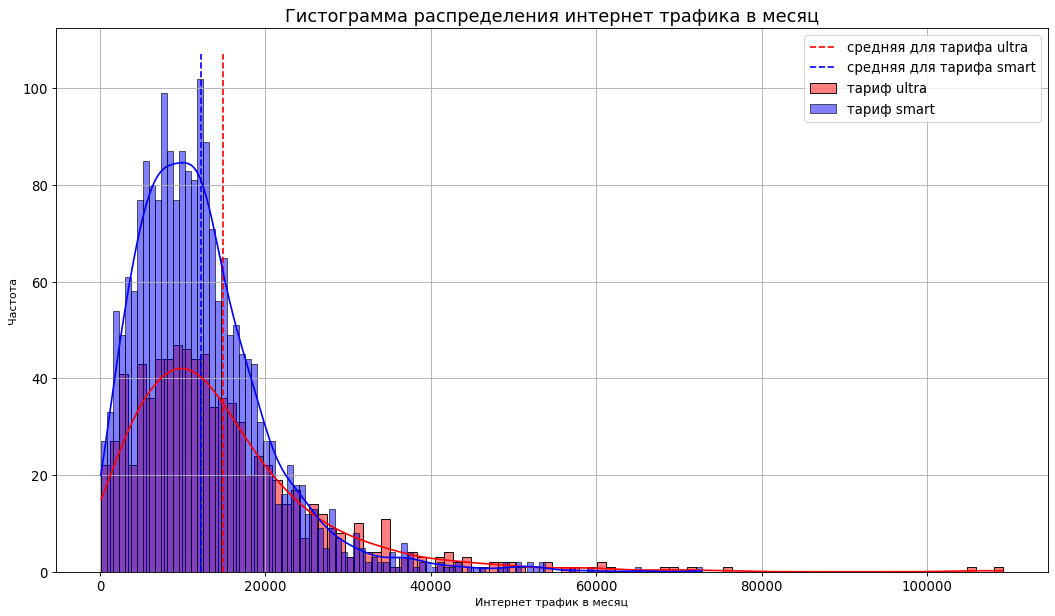

In [62]:
build_hist('internet_mb', title='Гистограмма распределения интернет трафика в месяц', xlabel='Интернет трафик в месяц')

И в том и вдругом случае на графике нормальное распределение со скошенностью вправо с очень близкими значениями средних. Это подтверждает тот факт что интернет примерно одинаково востребован у абонентов обоих тарифных планов.

### Вывод.

Абоненты тарифного плана "ultra" в среднем больше говорят по телефону в месяц, чем абоненты тарифа "smart", кроме того частоты длительности разговоров в месяц у абонентов тарифа "ultra" по своему значению достаточно равномерно разбросаны в широком диапозоне, что говорит о разнородности абонентов этого тарифа в плане использования тарифа именно для звонков. У абонентов тарифа смарт длительность разговоров в месяц больше сконцентрирована вокруг средней величины и даже имеется скос в правую сторону, что говорит о том что они стараются укладываться в лимиты разговоров.

Для смс сообщений в плане формы распределения у этих тарифов всё примерно одинаково и сводится к Пуасоновскому распределению, что говорит о не популярности этой услуги в целом, однако среднее количество смс в месяц у абонентов тарифа "ultra" в полтора раза больше чем у абонентов тарифа "smart".

В плане интернет трафика у этих тарифов всё практически одинаково, что говорит о востребованности этой услуги в целом, а скошенность гистограммы частот в правую сторону говорит о том что за месячными лимитами и там и там следят не так пристально - быть всегда онлайн важнее и тем и другим.

### Часть 4. Проверка гипотез.

<a id='3.8-bullet'></a>
### 8. Проверка гипотезы что средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается.

Для формулировки нулевой гипотезы будем исходить из того что альтернативная гипотеза должна быть рабочей, кроме того проверяется обычно гипотеза на равенство средних, исходя из этого **сформулируем нулевую гипотезу: средняя выручка от пользователей тарифов «Ультра» и «Смарт» одинакова**. 

**Альтернативной гипотезой будет: **средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается.**

Для проверки данной гипотезы воспользуемся оценкой T критерия для двух независимых совокупностей.

Возьмём критический уровень статистической значимости в размере 0.05.

Для того чтобы понять следует ли использовать Welch-test сравним дисперсии для **monthly_profit** у выборок:

In [63]:
print('Дисперсия месячных доходов для тарифа "Ultra":', np.var(ultra_users.monthly_profit, ddof=1))
print('Дисперсия месячных доходов для тарифа "Smart":', np.var(smart_users.monthly_profit, ddof=1))

Дисперсия месячных доходов для тарифа "Ultra": 640649.0654728783
Дисперсия месячных доходов для тарифа "Smart": 1056521.304644601


Дисперсии выборок отличается почти в два раза, по этому стоит применить Welch-test и выставить *equal_var=False*

In [64]:
print('p-значение:', st.ttest_ind(ultra_users.monthly_profit, smart_users.monthly_profit, equal_var=False).pvalue)

p-значение: 5.592173714286794e-181


p-значение гораздо меньше чем принятый нами критический уровень статистической значимости, по этому мы отвергаем нулевую гипотезу, а следовательно альтернативную гипотезу не отвергаем. Таким образом мы с большой долей вероятности можем сказать что **средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается.**

Узнаемот каких абонентов какого тарифного плана в среднем выручка больше:

In [65]:
print('Средняя выручка в месяц от абонентов тарифа "Ultra":', ultra_users.monthly_profit.mean())
print('Средняя выручка в месяц от абонентов тарифа "Smart":', smart_users.monthly_profit.mean())

Средняя выручка в месяц от абонентов тарифа "Ultra": 2097.7366849260825
Средняя выручка в месяц от абонентов тарифа "Smart": 1028.4087650551553


От абонентов тарифа "Ultra" в средне выручка больше в 2 раза.

<a id='3.9-bullet'></a>
### 9. Проверка гипотезы что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Сформулируем нулевую гипотезу: средняя выручка от пользователей из Москвы равна выручке от пользователей из других регионов.**

**Альтернативной гипотезой будет: средняя выручка от пользователей из Москвы отличается от выручки от пользователей из других регионов.**

Для проверки данной гипотезы воспользуемся оценкой T критерия для двух независимых совокупностей.

Для определения критического уровня статистической значимости, посмотрим сколько записей с клиентами из москвы в таблице.

Возьмём критический уровень статистической значимости в размере 0.05.

Для того чтобы понять следует ли использовать Welch-test сравним дисперсии для **monthly_profit** у выборок:

In [66]:
print('Дисперсия месячных доходов от абонентов из Москвы:', np.var(users_actions_per_months.query('city == "Москва"').monthly_profit, ddof=1))
print('Дисперсия месячных доходов от остальных абонентов:', np.var(users_actions_per_months.query('city != "Москва"').monthly_profit, ddof=1))

Дисперсия месячных доходов от абонентов из Москвы: 1143390.4697503394
Дисперсия месячных доходов от остальных абонентов: 1176691.85655289


Дисперсии выборок отличается отличаются очень не значительно, различие составляет <5%, по этому смысла применять Welch-test нету, выставим *equal_var=True*

In [67]:
print('p-значение:', st.ttest_ind(
    users_actions_per_months.query('city == "Москва"').monthly_profit, 
    users_actions_per_months.query('city != "Москва"').monthly_profit, equal_var=True).pvalue)

p-значение: 0.02922895189529429


p-значение оказалось меньше чем заданный нами уровень статистической значимости, а следовательно мы отвергаем нулевую гипотезу, а следовательно альтернативную гипотезу не отвергаем. Таким образом мы, с большой долей вероятности можем сказать, что **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Узнаем от каких абонентов в среднем выручка больше:

In [68]:
print('Средний доход в месяц от абонентов из Москвы:', users_actions_per_months.query('city == "Москва"').monthly_profit.mean())
print('Средний доход в месяц от остальных абонентов:', users_actions_per_months.query('city != "Москва"').monthly_profit.mean())

Средний доход в месяц от абонентов из Москвы: 1433.9152375768442
Средний доход в месяц от остальных абонентов: 1327.585696986171


Москва приносит в среднем больший доход.

<a id='3.10-bullet'></a>
### Часть 5. Общий вывод.

По результатам проведённого анализа выборки клиентов федерального оператора сотовой связи «Мегалайн» были сделаны следующие выводы:

* Абоненты тарифа "ultra" в среднем тратят больше минут разговора в месяц чем абоненты тарифа "smart". Кроме того, если для тарифа 'smart' характерно нормальное распределение со скошенностью влево и большинство значений сосредоточено не очень далеко от средней, то для тарифа "ultra" распределение более равномерное на достаточно большом промежутке и разброс от среднего достаточно большой, что может говорить о разнородности абонентов этого тарифа. Но не смотря на это, абоненты тарифа "smart" очень часто не укладываются в месячный лимит по минутам разговора (о чём говорит близость средней помесячной траты минут к тарифному лимиту и в целом гистограмма распределения минут разговора в месяц), в то время как абоненты "ultra" всегда в него укладываются.

* По количеству смс сообщений в месяц картина схожа с количеством минут разговора. Хоть абоненты тарифа "ultra" в среднем чаще пользуются этой услугой, но они всегда укладываются в лимит, а абоненты тарифа "smart" достаточно часто в него не укладываются.

* Интернет трафиком на обоих тарифах пользуются примерно одинаково, что говорит о востребованности этой услуги в целом и тут абоненты обоих тарифов выходят за пределы ежемесячного лимита, но абоненты тарифа "smart", опять же, делают это гораздо чаще.

* Не смотря на то что абоненты тарифа "smart" на много чаще перебирают лимит по всем предоставляемым услугам, тем самым платя за перерасход, это не компенсирует более высокой абонентской платы в тарифе "ultra", на что указывает то что мы не подтвердили гипотезу что средняя выручка от пользователей тарифов «Ультра» и «Смарт» одинакова. По этим резултатам можно сделать вывод что многим абонентам тарифа "smart" был бы интересен тариф с увеличинными лимитами по всем услугам.

* При проверке гипотезы что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов мы отвергли гипотезу о том что средняя выручка от пользователей из Москвы не отличается от выручки от пользователей из других регионов. Однако, тут велика вероятность ошибки первого рода из за того что найденное p-значение не сильно ниже заданного нами критического уровня статистической значимости. Возможно следует провести дополнителоьные исследования в этой области и не отказываться от расширения сетей в регионах. Возможно это связано с тем, что в Москве больше людей подключено к тарифу "Ultra", что и даёт такую разницу. Возможно, достаточно привлечь людей в регионах на этот тариф.

В целом, напрашивается тариф по середине между "Ultra" и "Smart" как по лимитам, так и по цене.